# **INSTALLATION**

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
pwd

In [ ]:
cd /content

In [ ]:
!git clone https://github.com/tensorflow/models.git

In [ ]:
pwd

In [ ]:
cd /content/models/research

In [ ]:
pwd

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

In [ ]:
cd cocoapi/PythonAPI

In [ ]:
!make

In [ ]:
cp -r pycocotools /content/models/research

In [ ]:
pwd

In [ ]:
cd /content/models/research

In [ ]:
pwd

In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install --use-feature=2020-resolver .

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

# **Model Download**

In [ ]:
pwd

In [ ]:
cd /content/drive/MyDrive/training_demo/pre-trained-models

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

In [ ]:
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

In [ ]:
!tar -xvf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

# **Label Map Creation**

In [ ]:
!pip install pandas

In [ ]:
cd /content/drive/MyDrive/training_demo

In [ ]:
labels = [{'name':'ambulance', 'id':1}, {'name':'auto-rickshaw', 'id':2},{'name':'bicycle', 'id':3},{'name':'bus', 'id':4},{'name':'car', 'id':5},{'name':'garbage van', 'id':6},
          {'name':'human hauler', 'id':7},{'name':'minibus', 'id':8},{'name':'minivan', 'id':9},{'name':'motorbike', 'id':10},{'name':'pickup', 'id':11},
          {'name':'army vehicle', 'id':12},{'name':'police car', 'id':13},{'name':'rickshaw', 'id':14},{'name':'scooter', 'id':15},{'name':'suv', 'id':16},
          {'name':'taxi', 'id':17},{'name':'three wheelers (CNG)', 'id':18},{'name':'truck', 'id':19},{'name':'van', 'id':20},{'name':'wheelbarrow', 'id':21}]

In [ ]:
with open( '/content/drive/MyDrive/training_demo/annotations' + '/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# **Generating TFrecords**

In [ ]:
pwd

In [ ]:
ls

In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/drive/MyDrive/training_demo/images/train -l /content/drive/MyDrive/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/training_demo/annotations/train.record

In [ ]:
# Create test data:
!python generate_tfrecord.py -x /content/drive/MyDrive/training_demo/images/test -l /content/drive/MyDrive/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/training_demo/annotations/test.record

# **Training Dataset**
*(Was trained in local machine)*

In [ ]:
cd /content/drive/MyDrive/training_demo

In [ ]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/training_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/drive/MyDrive/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config 

In [ ]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/training_demo/models/my_ssd_mobilenet_v2_fpn_640x640 --pipeline_config_path=/content/drive/MyDrive/training_demo/models/my_ssd_mobilenet_v2_fpn_640x640/pipeline.config 

# **Evaluation of Model**
*(Was done on local machine)*

In [ ]:
cd /content/drive/MyDrive/training_demo/models/my_ssd_mobilenet_v2_fpn_640x640/train

In [ ]:
tensordboard -logdir=.

In [ ]:
cd /content/drive/MyDrive/training_demo/models/my_ssd_mobilenet_v2_fpn_640x640/eval

In [ ]:
!python model_main_tf2.py --model_dir=F:\deep_learning\tensorflow\workspace\training_demo\pre-trained-models\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 --pipeline_config_path=F:\deep_learning\tensorflow\workspace\training_demo\models\my_ssd_mobilenet_v2_fpn_640x640\pipeline.config --checkpoint_dir=F:\deep_learning\tensorflow\workspace\training_demo\models\my_ssd_mobilenet_v2_fpn_640x640

In [ ]:
tensordboard -logdir=.

# **Exporting Trained Model**

**SSD_Resnet101_V1**

In [ ]:
cd /content/drive/MyDrive/training_demo

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/training_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/drive/MyDrive/training_demo/exported-models/my_model

**SSD_MobilenetV2_FPN_640x640**

In [ ]:
cd /content/drive/MyDrive/training_demo

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/training_demo/models/my_ssd_mobilenet_v2_fpn_640x640/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/training_demo/models/my_ssd_mobilenet_v2_fpn_640x640 --output_directory /content/drive/MyDrive/training_demo/exported-models/my_model_3

# **Inference**

### **Image**

Loading model...Done! Took 15.331305265426636 seconds
Running inference for /content/drive/MyDrive/training_demo/images/Final_Test/Pias (309).jpg... Done


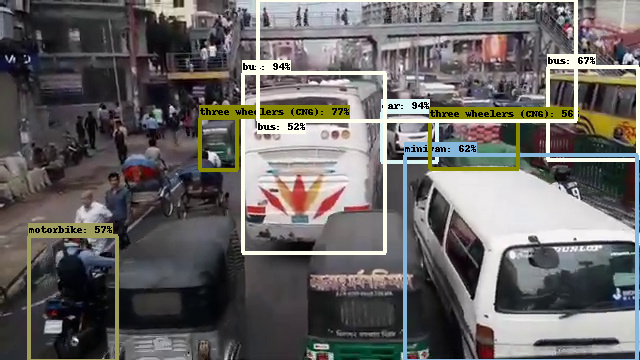

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/drive/MyDrive/training_demo/images/Final_Test/Pias (309).jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/training_demo/exported-models/my_model_3'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/drive/MyDrive/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.50)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED

###**Video**

In [ ]:
pwd

In [ ]:
cd /content/drive/MyDrive/training_demo

In [ ]:
ls

In [ ]:
!python detect-objects.py --video_input --threshold 0.5 --model_path /content/drive/MyDrive/training_demo/exported-models/my_model_3/saved_model --path_to_labelmap /content/drive/MyDrive/training_demo/annotations/label_map.pbtxt --video_path /content/drive/MyDrive/training_demo/images/video/Incredible_traffic_Dhaka.mp4